# Machine Learning Project 2024 
### Emma Farrell - G00398267
***

## Table of Contents
* [Introduction](#introduction)
* [Tasks](#tasks)
    * [Imports and reviewing the data](#imports)
    * [Variable Classification](#classification)
    * [Summary Statistics](#summary)
    * [Plots](#plots)
* [Project](#project)
    * [Supervised Learning](#supervised)
    * [Classification Algorithms](#classalgorithms)
    * [Algorithm Application](#algorithmapp)
* [References](#references)

***

# Introduction <a class="anchor" id="introduction"></a>


## Machine Learning 
Machine Learning (ML) is the use of statistical algorithms and datasets to enable a computer program to "teach" itself how to predict outcomes based on input data without being explicitly programmed how to do so. It is a branch of AI, a dicipline in Computer Science that attempts to mimic human behaviour in computers. It has many applications in today's world, e.g. in recommendation engines for streaming services and speech-to-text programs to create captions. [[1]](#1) 

In this notebook, we will look at a specific dataset and apply Machine Learning practices to it. We will categorise the types and scale of the data, plot it to estimate distribution, and apply a classification algorithm called K Nearest Neighbours to train it to predict an outcome. 

## Abalone Dataset 
The Abalone Dataset is a set of data that describes sex and physical characteristics of abalone molluscs, with the output data being the number of "rings" that appear when they are cut open and stained. These rings indicate the age of the abalone, and the process for obtaining them is time and labour intensive. This dataset attempts to see if the age can be predicted using physical characteristics (mass, length) that are more easy to obtain than the ring count. [[2]](#2)
***

# Tasks <a class="anchor" id="tasks"></a>
***

## Imports and reviewing the data <a class="anchor" id="imports"></a>

In [100]:
# Import packages required for the analysis and visualisation.
import pandas as pd # Used for structuring the data
import seaborn as sns # Used for plotting/visualising
import matplotlib.pyplot as plt
import sklearn as skl # Used to run the ML algorithm
import sklearn.preprocessing as spre # Used in preprocessing the data for the ML model
import sklearn.decomposition as dec # Used in principal component analysis
import sklearn.neighbors as clf # Used to run the ML 
import numpy as np # Used to structure data

In [8]:
# Import the data and pass to a pandas datafrome.
df = pd.read_csv('abalone.csv')

# View the first and last 5 rows of the data
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Variable Classification <a class="anchor" id="classification"></a>

### Types and Scales of Variables Used
#### Types
It is important to consider the difference between data types before beginning analysis, as they will influence the type of calculations that can be done. Categorical data, in this example, sex, assigns the observed result to one of a few fixed, finite categories. In this case, the observation can be Female, Male or Infant. The rest of the data types are numeric; the length and mass measurements are continuous and the rings are integers. Continuous means that the numbers are real, and include all decimal numbers between whole numbers. Integers refers to whole numbers only. This makes sense when one thinks about the fact that it is a count of the number of rings found in the shell of the abalone - it would be difficult to have a fraction of a ring. In this example, however, the rings will be treated as categorical data. This is because the aim of the ML project is to classify the abalone by number of rings.

#### Scale
Categorical values do not have numerical scale, the data just sits in the appropriate category it belongs to.
The continuous data in this dataset are made up of length measurements (in mm) and mass measurements (in grams). 

Having all lengths of the same unit and all masses of the same units of measurement makes it easier to compare lengths with each other and masses with each other. No unit conversion needs to take place within the Python code to scale all of the measurements with each other, and summary statistics such as average and standard deviation can be compared between different variables with no mathematical manipulation required. Scales on plots also do not need to be adjusted, or shown on a logarithmic scale, which is useful when visualising the data.

According to the source of the dataset: 'the ranges of the continuous values have been scaled for use with an ANN' (artificial neural network)' (by dividing by 200)'. [[2]](#2) This makes sense when looking at the measurements and comparing them with photos of abalone found on the internet. A length of 0.455mm, for example, would be tiny, but multiplying by 200 would give a measurement of 91mm, or 9.1cm, which aligns more closely with reality.

<img src=abaloneActual.jpg caption ='three abalone specimens being held aloft by human hands'>

Abalone shellfish being collected. Image obtained from https://culturedabalone.com/

If one wanted to do some rudimentary density calculations, this could be possible with the assumption of the Abalone specimens having an ellipsoid shape. Density is measured as mass per unit volume. The length measurements could be used to calculate volume, but this would probably need to be converted from mm3 to cm3. 

#### Inputs vs outputs
When doing analysis below, all variables except Rings will be considered to be Input variables. This is because it is hoped that these input variables can be used to predict the output variable, age (which is known by the number of rings). 

## Summary Statistics <a class="anchor" id="summary"></a>
Sex / nominal / -- / M, F, and I (infant)
For nominal/categorical data, calculations such as average/standard deviation are not possible. What is more appropriate here is to show the frequency of occurence for each category as well as a total count of samples. When using the .describe() function on non-numeric data, pandas reverts to the following summary data:

In [14]:
df['sex'].describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

The 'unique' result above tells us there are 3 possible categories, which we know are M, F and I. The 'top' result tells us that there are majority M, occuring at a frequency 'freq' of 1528. Out of a total count of 4177, this is over a third of the results. 

In [16]:
# Calculation of precentage of Male abalone within the samples
# Summing all male in the original dataframe and dividing by count
# Multiplying by 100 to get percent
(((df['sex']=='M').sum())/df['sex'].count())*100


36.58127842949485

Since 'rings' is going to be treated as categorical, the same summary statistics will be found. To prevent the column from being treated as a number, and returning standard deviation etc, astype('object') will be used on the describe function.

In [18]:
rdf = df['rings']
rdf.astype('object').describe()

count     4177
unique      28
top          9
freq       689
Name: rings, dtype: int64

For the rest of the data, count, mean (or average), standard deviation, min, max, and percentiles 25, 50 and 75% give a good initial insight into the data.

In [20]:
# To exclude rings and sex, the exclude parameter is used
df.describe(exclude=[int,object])

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


Interestingly, there is a zero value for min height. This is possibly due to a rounding error, or data entry error. Removing zero values may be necessary during the analysis. 

## Plots <a class="anchor" id="plots"></a>

As stated above, sex is a categorical variable without numeric value. The most suitable plot for this variable is a histogram, which displays the frequency of occurence in the data set for each category. Seaborn has a plot called countplot which is most suitable for this case.

<Axes: xlabel='sex', ylabel='count'>

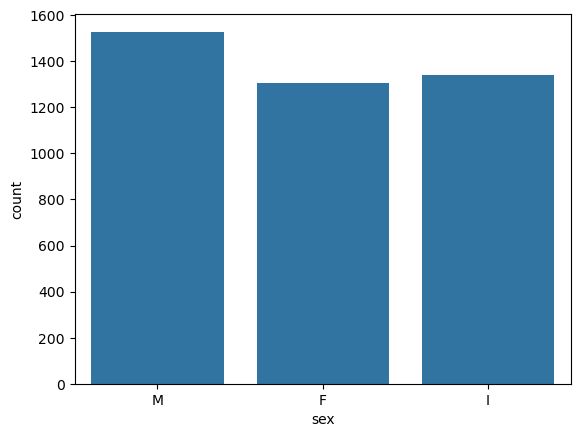

In [24]:
sns.countplot(data = df, x ='sex')

The distribution of the data approximates a uniform distribution. For this type of data, this is called a Categorical Distribution.[[3]](#3) This tells us that all of the abalone samples are approximately equally likely to be either Male, Female or an Infant, which makes intuitive sense when you think about the fact that animals are equally likely to be male or female. (Show adult vs infant)



Plotting the rings as a count plot, we get something approximating a normal distribution, with a large tail on the right. This makes sense as the abalone can only increase in age, increasing the number of rings. The average seems to lie around 9 rings.

<Axes: xlabel='rings', ylabel='count'>

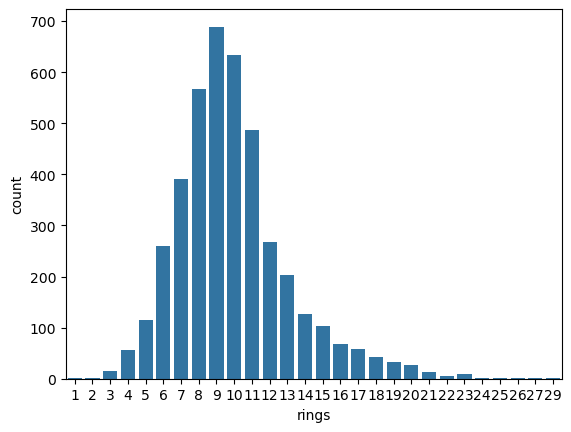

In [27]:
sns.countplot(data = df, x ='rings')

Since the sex data is divided into adult and infant, it would make sense to plot rings against sex, since 'infant' implies less rings, as they are younger in age. A displot can show the distribution of rings while splitting out by sex. Setting the plot to type 'kde' makes it easier to see the overlap in the categories. 

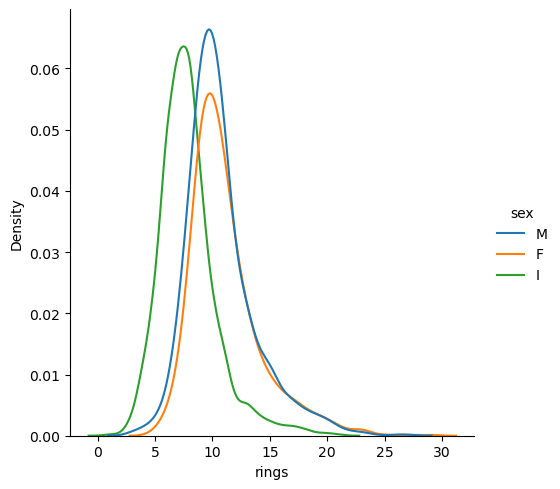

In [29]:
sns.displot(df[['sex','rings']], x='rings', hue = 'sex', kind='kde')

This shows a large overlap between infants and adults (male and female). It's difficult to know why some were categorised as infants and some not when they have the same number of rings. Possibly it is difficult to sex abalone when they are young, so if unknown, they were classed as infants. With this amount of overlap, it is uncertain if sex is a useful category. 

For the next phase of plotting, it will be useful to colour code the rings variable to see how it affects the distribution of other variables.
Pairplots are useful for giving a quick view of how all of the data relates to each other, as well as how it is distributed. Below, hue is set to rings to observe any obvious patterns that might help in prediction.

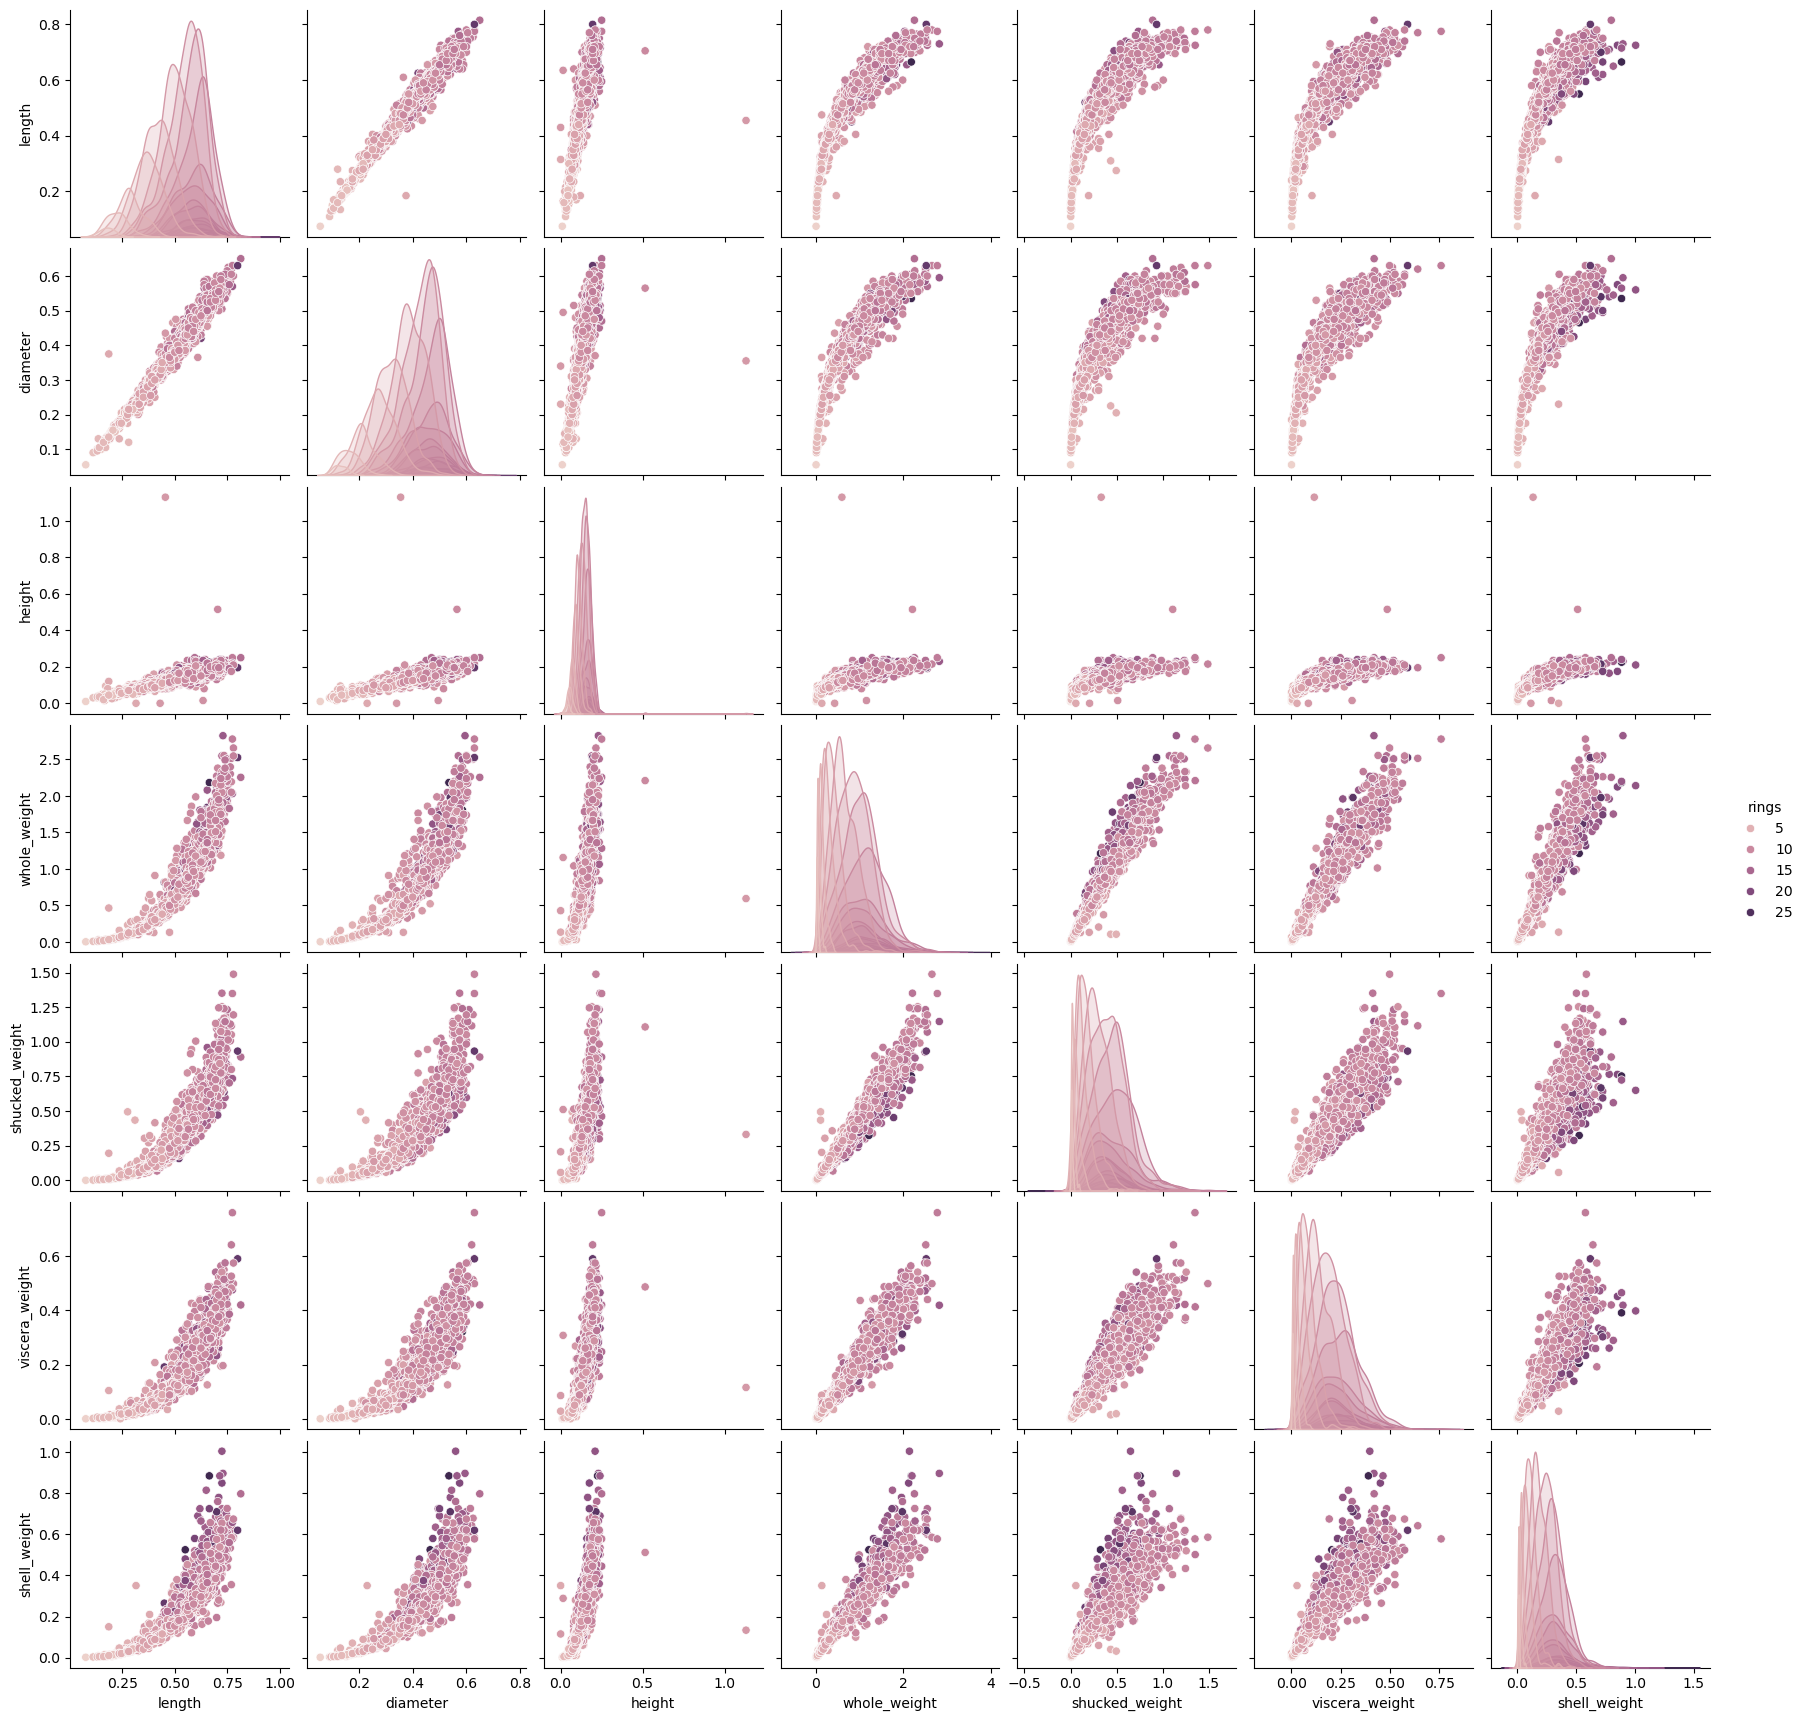

In [32]:
sns.color_palette("deep")
sns.pairplot(df, hue = 'rings')#y_vars = 'rings'

All measurements show approximation to the normal distribution with some skewing. The distance measurements tend to skew left, while the mass measurements tend to skew right. Height is notable in that is is very 'narrow', while having a couple of large outliers. This makes sense when referring back to the summary statistics, as the max was 1.13, while the 75th percentile was 0.165, meaning 75% of height measurements were less than 0.165. 

Not much distinct pattern is seen in the rings. Shell weight and length look like there is some pattern appearing with more rings, but there is a great deal of overlap in the categories of rings. This will possibly make it difficult to classify by rings when applying a classification algorithm.
***

# Project <a class="anchor" id="project"></a>
***
In this section, I will conduct an analysis of a classification algorithm applied to the abalone.csv data set described above.

## Supervised Learning <a class="anchor" id="supervised"></a>
Supervised learning is a type of Machine Learning. What distinguishes this type from other types of Machine Learning is that it uses labelled data.[[4]](#4) This means that the input data has the "answer", or, desired output already associated with it. This is used to train the model, so when a new set of input data is added, it can predict what the output will be. This is distinct from another type of machine learning, unsupervised learning, which uses unlabelled data to try to find patterns and relationships. Supervised learning is primarily used in classification and regression. [[5]](#5)

## Classification Algorithms <a class="anchor" id="classalgorithms"></a>
Classification Algorithms are a method of supervised learning that aims to predict the class or category a given sample will fall into based on a set of data inputs.[[6]](#6) This differs from regression, another method of supervised learning, where the output being predicted is a continuous numerical value.[[7]](#7) Classification algorithms have uses in machine learning models for detecting spam, image classification and sentiment analysis.[[7]](#7)

Looking at the output for the Abalone Dataset, numerical age, it would seem as if regression would be suitable here; however age is an integer, not a real number. The abalone are either one age or another age, they cannot be a fraction of an age (for our purposes). Therefore, treating the ages as classes is the most suitable method here. 

## Algorithm Application <a class="anchor" id="algorithmapp"></a>

### K Nearest Neighbour
The K Nearest Neighbour (KNN) algorithm is a supervised learning algorithm that uses proximity between data and 'majority vote' of the classes of nearby data to make predictions. It can be used for either classification or regression modelling.[[8]](#8)

The KNN algorithm measures the 'distance' between points in a dataset, and maps them to the output categories provided. It then uses this distance calculation to determine the likelihood new data points introduced are to fall into the different cagegories, by measuring how far the data points are located from the existing data points. [[8]](#8)

There are a few methods to measure the distance between data points. Most will subtract the data points from each other and sum all of the resulting differences. To minimise negative numbers from skewing the distance, some methods (such as the Manhatten measure of distance) use the absolute value of the subtraction before adding the differences. Euclidean distance calculation squares the differences, instead of finding the absolute value, then finds the square root of the total. The Minkowski method combines these two methods and uses absolute value to the power of a value p, then finds the pth root.[[8]](#8) 

Below is the equation of the Minkowski method. Note that when p=1, this give the Manhatten measure, when p=2 this gives the Euclidean measure.

$(\sum\limits_{i=1} ^{n}\lvert{x_{i}-y_{i}}\rvert^p)^{1/p}$

When the model is trained against the labelled dataset, the hope is that it can be used to predict outputs when new data is introduced. In the case of the Abalone Dataset, measurements of length and mass of newly obtained abalone can be used to predict their ages. This happens by comparing the measurements against those in the training set, measuring the distances between the data, finding the k number of closest values in the existing model and ordering them from closest to furthest. The majority of the data 'closest' to the new data that are in a particular class will predict the class that the new data is in.[[8]](#8) 

From the explanation above, one can see that there are a number of parameters that need to be decided upon, such as distance measuring method and choice of how many 'neighbours' or k to factor into the classification calculation. 

### Preprocessing
Before applying the training data to the algorithm, it is a good idea to clean up the data to remove the possiblity of skewing or biasing. 

#### Empty rows
According the the source of the data set, all rows with missing values were removed[[2]](#2) However, to be certain, the pandas function .dropna() is used on the dataframe to remove any rows with missing data. 

In [43]:
df = df.dropna()
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Obtain Numerical Data
For the purposes of training, I am only interested in the continuous numerical data. With this in mind, I am going to obtain the length, diameter, height, whole_weight, shucked_weight, viscera_weight and shell weight measurements from the overall dataframe and put them into their own dataframe. 

In [45]:
X = df[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]
y = df['rings']

#### Units and Scale
Reviewing some rows of data chosen at random, it appears that most of the variables are on a similar scale to each other. They have roughly the same number of decimal points, are to a similar power of 10, and nothing sticks out as being very large or very small relative to the rest of the data. All length measurements are in milimetres (mm) and mass measurements are in grams (g), so no unit conversion is required. 

In [47]:
X.loc[0]

length            0.4550
diameter          0.3650
height            0.0950
whole_weight      0.5140
shucked_weight    0.2245
viscera_weight    0.1010
shell_weight      0.1500
Name: 0, dtype: float64

In [48]:
X.loc[222]

length            0.4900
diameter          0.3750
height            0.1500
whole_weight      0.5755
shucked_weight    0.2200
viscera_weight    0.1440
shell_weight      0.1900
Name: 222, dtype: float64

In [49]:
X.loc[3419]

length            0.5900
diameter          0.4700
height            0.1350
whole_weight      1.1685
shucked_weight    0.5390
viscera_weight    0.2790
shell_weight      0.2800
Name: 3419, dtype: float64

In [50]:
X.loc[4176]

length            0.7100
diameter          0.5550
height            0.1950
whole_weight      1.9485
shucked_weight    0.9455
viscera_weight    0.3765
shell_weight      0.4950
Name: 4176, dtype: float64

Let's see if there is any effect when the data is squared, as any very small or very large numbers might skew the KNN model. 

In [52]:
# First few steps of Euclidean distance, when the distances are calculated, squared and summed
(((X.loc[222]-X.loc[4176])**2).sum())

2.6413854999999993

In [53]:
# Final Euclidean distance, with square root of above, calculated by using the power of 0.5
(((X.loc[222]-X.loc[4176])**2).sum())**0.5

1.6252339831544254

The Euclidean distance calculation between two of the points has shown no numbers larger or smaller by powers of ten when compared to the data reviewed above. This reflects the analysis done earlier with the summary statistics that showed no large differences in magnitude of the data. 

#### Scaling 
A part of preprocessing is feature scaling. This normalises the data so that features that have a wide range of values do not entirely influence the distance calculation. [[9]](#9) What happens is the data has its mean centred around 0, and standard deviation close to 1, using the following equation:

$z = (x - u) / s$

where x is the data point itself, u is the mean and s is the standard deviation. This gets applied to all datapoints to scale them as follows:

In [58]:
# Create instance of scaler
scaler = spre.StandardScaler()

# Fit the data within the scaler
scaler.fit(X)

StandardScaler()

In [59]:
#Transform the data in the dataframe using the equation outlined above.
# Output is a numpy array
X_transformed = scaler.transform(X)

In [60]:
X_transformed

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [61]:
# Reset to pandas DF
df_Xtransform = pd.DataFrame(X_transformed, columns = X.columns)

# Mean of all features now approximates to 0 
# Standard deviation now approximates to 1
# Data is now normalised
df_Xtransform.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00


#### Principal Component Analysis
The Abalone Dataset has a large number of features, 7 in use in this analysis, which means a lot of dimensions to measure distances for the model. Principal Component Analysis reduces the number of dimensions by transforming the data onto a new coordinate system so that large variations can be identified.[[10]](#10) [[11]](#11)

In [82]:
# Create instance of PCA
pca = dec.PCA(n_components=2)
# Fit the transformed data to the PCA
pca.fit(df_Xtransform)

PCA(n_components=2)

In [84]:
# Transform the data
Xtrans_pca = pca.transform(df_Xtransform)
Xtrans_pca



array([[-1.47825647, -0.17003235],
       [-3.14681789,  0.27842189],
       [-0.47578124, -0.51193194],
       ...,
       [ 1.73110498,  0.14715792],
       [ 1.66442367, -0.15614448],
       [ 4.73098805,  0.78490833]])

In [65]:
# Ratio is not evenly distributed. 
pca.explained_variance_ratio_ 

array([0.90787315, 0.03991891])

As seen above, the variance ratio is skewed towards the first column, when normalising the data should have prevented this. Let's graph the data to see what's happening.

In [67]:
# Combine transformed data with the output data rings
df_Xtrans_pca = pd.DataFrame(df[['rings']])
df_Xtrans_pca['pca0'] =  Xtrans_pca[:, 0]
df_Xtrans_pca['pca1'] =  Xtrans_pca[:, 1]

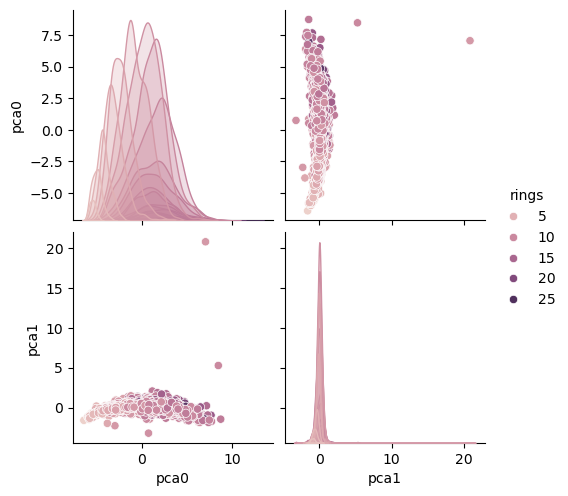

In [68]:
sns.pairplot(df_Xtrans_pca, hue='rings')

The data in pca1 when graphed resembles the distribution seen in the height data during the inital analysis. It is possible that this is skewing the data. It might be worthwhile attempting the PCA transform again, dropping the height data.

In [70]:
# Remove the height data
df_Xtransform = df_Xtransform[['length','diameter','whole_weight','shucked_weight','viscera_weight','shell_weight']]

df_Xtransform

,length,diameter,whole_weight,shucked_weight,viscera_weight,shell_weight
0,-0.574558,-0.432149,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...
4172,0.341509,0.424464,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.541998,0.773341,0.733627,0.410739


In [71]:
# Create instance of PCA
pca = dec.PCA(n_components=2)
# Fit the transformed data to the PCA
pca.fit(df_Xtransform)

# Transform the data
Xtrans_pca = pca.transform(df_Xtransform)
Xtrans_pca

array([[-1.47825647, -0.17003235],
       [-3.14681789,  0.27842189],
       [-0.47578124, -0.51193194],
       ...,
       [ 1.73110498,  0.14715792],
       [ 1.66442367, -0.15614448],
       [ 4.73098805,  0.78490833]])

In [72]:
# No effect on the ratio
pca.explained_variance_ratio_ 

array([0.93609593, 0.03017313])

In [73]:
# Combine transformed data with the output data rings
df_Xtrans_pca = pd.DataFrame(df[['rings']])
df_Xtrans_pca['pca0'] =  Xtrans_pca[:, 0]
df_Xtrans_pca['pca1'] =  Xtrans_pca[:, 1]

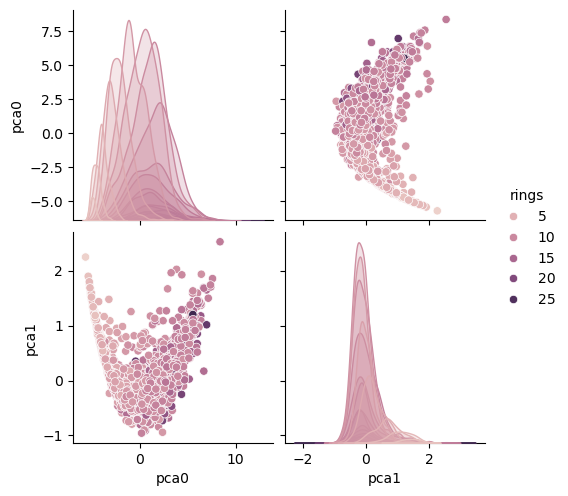

In [74]:
sns.pairplot(df_Xtrans_pca, hue='rings')

Unfortunately, this has had no effect on improving the ratio. However the plotted data has more spread, so removing the height has made some difference.

#### Split for Training vs Test
The data needs to be split into two dataframes, one for training and the other for testing. The training dataframe will be used to 'train' the KNN model, the testing data frame will be used to try to predict using the trained model to see if it is able to predict the number of rings.

In [87]:
# train_test_split - this splits input and output dataframes into two dataframes at random
# better than just splitting the dataset in two according to rows, and it reduces bias 
# (e.g., all of the larger abalone might have been measured at the end)
# Test_size sets the ratio of rows in the test set to that in the training set
# Need a large amount of data for training set to make sure it had enough data to work with
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(df_Xtrans_pca, y, test_size=0.15)

#### Application of KNN Classifier

Now that the data has been cleaned up and transformed, it is ready to be processed through the KNN classifier. By default, it sets k=5, but this is not necessarily the best value to use for k. To check for this, we can loop through several values of k, and check how effective it is by using cross validation[[12]](#12) This determines an accuracy score by keeping back some data within the training set to use as a test, and iterating this several times. 

In [93]:
# generate several values for k and add them to a list
k_values = [i for i in range (1,31)]
scores = []

# loop through k_values list to apply knn with different values of k
# Cross validate each time and add the results to a list
for k in k_values:
    knn = clf.KNeighborsClassifier(n_neighbors=k)
    score = skl.model_selection.cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

C:\Users\farree1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\farree1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\farree1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\farree1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\farree1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members

Note: the warning generated when using cross validator indicates that having less than n_splits per class may be an issue. It might have been worth considering removing rows that only represented one of its own group of rings. 

Text(0, 0.5, 'Accuracy Score')

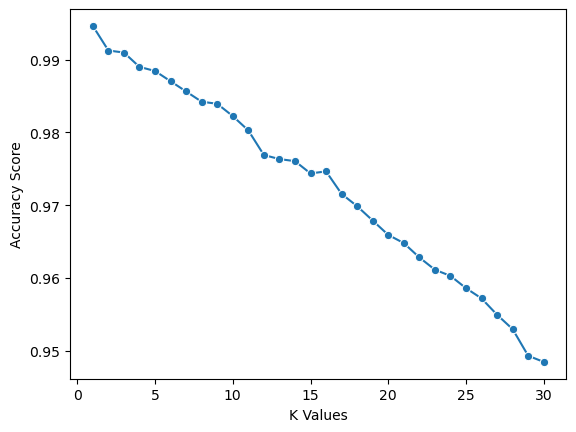

In [102]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

It looks like increasing k reduces the accuracy of the model. The default value of 5 will probably be sufficient.

Now that k=5 has been decided on, it is time to fit the training data to the model

In [95]:
# Create instance of the knn model
knn= clf.KNeighborsClassifier() 
knn.fit(X_train, y_train)

KNeighborsClassifier()

It would be useful to try to use some of the data in the testing set and see if the model can now predict how many number of rings they will have. 


In [104]:
# This generates an array of predictions of all of the test data
knn.predict(X_test) == y_test

# get the total amount and a count of the predictions that were true
total = (knn.predict(X_test) == y_test).count()
correct = (knn.predict(X_test) == y_test).sum()

# Calculate the precentage correct
((correct)/(total))*100

98.56459330143541

This model is showing 99.3% success rate on the test data, which is nice to see.

#### Cross Validation

Previously, cross validation was done on the training set to check for the ideal value of k. Now, to do proper cross validation, the model needs to be scored against the training data.

In [109]:
from sklearn.model_selection import cross_val_score

scores = skl.model_selection.cross_val_score(knn, X_test, y_test, cv=5)
scores

C:\Users\farree1\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.91269841, 0.92857143, 0.92      , 0.936     , 0.944     ])

The scores show over 69% for all tests, which not quite what one would hope for. Looks like those scientists are going to have to keep cutting open those abalone to determine their age!

#### Further Study
It would be interesting to see how this would look modelled using a different algorithm, such as random forest classifier. It is also possible that some data points should have been removed due to rounding causing them to be less effective. It is also difficult to classify ages, and may have been a better approach to bucket the data into age ranges instead.

# References <a class="anchor" id="references"></a>
***

1. What is machine learning (ML)? - https://www.ibm.com/topics/machine-learning <a class="reference" id="1"></a>
2. UC Irvine Machine Learning Repository - information on Abalone dataset https://archive.ics.uci.edu/dataset/1/abalone <a class="reference" id="2"></a>
3. Categorical Distribution - https://en.wikipedia.org/wiki/Categorical_distribution <a class="reference" id="3"></a>
4. Supervised and Unsupervised learning - https://www.geeksforgeeks.org/supervised-unsupervised-learning/ <a class="reference" id="4"></a>
5. Supervised versus unsupervised learning: What's the difference? - https://www.ibm.com/think/topics/supervised-vs-unsupervised-learning <a class="reference" id="5"></a>
6. Learn classification algorithms using Python and scikit-learn - https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-classification-algorithms/ <a class="reference" id="6"></a>
7. Regression vs. Classification: Understanding the Differences and Use Cases - https://medium.com/@abelkuriakose/regression-vs-classification-understanding-the-differences-and-use-cases-6cd51c23611 <a class="reference" id="7"></a>
8. What is the k-nearest neighbors (KNN) algorithm? - https://www.ibm.com/topics/knn <a class="reference" id="8"></a>
9. Feature scaling - https://en.wikipedia.org/wiki/Feature_scaling <a class="reference" id="9"></a>
10. 
Principal Component Analysis Guide & Exampl - https://statisticsbyjim.com/basics/principal-component-analysis/ <a class="reference" id="10"></a>
11. Principal component analysis - https://en.wikipedia.org/wiki/Principal_component_analysis <a class="reference" id="11"></a>
12. K-Nearest Neighbors (KNN) Classification with scikit-learn - https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn <a class="reference" id="12"></a>
